In [ ]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = False

In [ ]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
# Uncomment the following line to run in Google Colab to install OpenML
#!pip install --quiet git+https://github.com/openml/openml-python.git@develop

In [ ]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructione below.
#import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') 

In [ ]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/drive/MyDrive/cache')

In [ ]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

In [ ]:
# Fill in your names using the format below
your_name = "LAST_NAME, FIRST_NAME"

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed up training a lot. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 4th cell on the top of this notebook to check that the GPU is found.

Note that the free version of Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine. Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right before the deadline.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you. Be sure to upload all .h5 and .p files, as well as any .json files created (these are created only for large models).

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
  * The 2nd cell (above) does this programmatically for you
* Fill in the path to your assignment folder below
  * It's likely `base_dir = '/content/drive/My Drive/assignment-3-name'`
  * 'name' will likely be your github handle

In [ ]:
# Define where the models should be stored
#base_dir = '/content/drive/My Drive/assignment-3-test'
base_dir = './'

### Verification and submission

If you use Colab, there are a few things to consider before submission:
* You need to download the notebook and all the models from your Google Drive to a local folder. Models should be stored in the main directory, next to your notebook.
* To run the notebook locally (e.g. for the verification script), make sure that you have set `stop_training = True` in the first cell to avoid retraining all models. Also comment out any Colab-specific code in the cells above.
* Set `base_dir` back to your local directory where the files are, likely `base_dir = './'`
* Again, don't wait until the last moment to verify and submit.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are. We provide code below that stores the model efficiently. Smaller models are simply stored entirely to disk as one h5 file. For larger models, we will only store the weights (h5 file) and structure (json file), and ignore the state of the optimizer. In any case, the weights alone should not take more than 100MB of storage. Take this into account especially for loading pre-trained models in the last question. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage.
* When questions ask you to provide an explanation, it should be less than 800
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters", yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your models perform. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance, with the top grade awarded to the best model in class. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time, especially if you have limited RAM on your local device (laptop). Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now). That way the dataset will be cached so that you can do the verification faster.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

### Data
The [Oxford Pets](https://www.openml.org/d/42820) dataset contains 128-by-128 RGB images of 37 different types of cats and dogs. Your goal is to build models that recognize the correct type of animal in each image. Below is the list of all classes and the subset of cat breeds.

In [ ]:
# Download the Oxford Pets dataset. Takes a while, and quite a bit of memory when it 
# needs to download. After caching it loads faster.
oml.config.server = 'https://test.openml.org/api/v1/'
oxford_pets = oml.datasets.get_dataset(17994, download_data = False)

X, y, _, _ = oxford_pets.get_data(dataset_format='array',
    target = oxford_pets.default_target_attribute)

class_names = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 
               'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 
               'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
               'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland',
               'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier',
               'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
cat_breeds = ['abyssinian', 'bengal','birman', 'bombay', 'british_shorthair', 'egyptian_mau', 'maine_coon',
              'persian', 'ragdoll', 'russian_blue', 'siamese', 'sphynx']

Reshape, sample and split the data

In [ ]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),128,128,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [ ]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

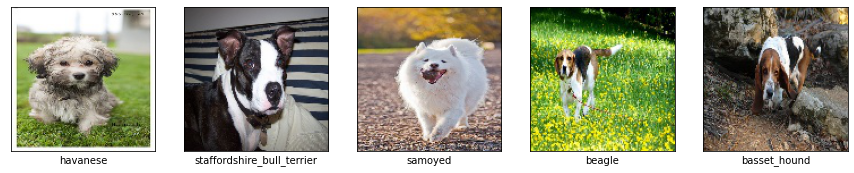

In [ ]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(15,30))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel(class_names[np.argmax(y[n])])
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

# Helper function for user feedback
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Helper function to format answers
def print_answer(ans):
    output = ""
    for line in ans.splitlines()[0:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
    

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed.
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Evaluation harness
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not. Set batch size to None when using a generator.
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with. Set batch size to None when using a generator.
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    print_model -- whether or not to print the model
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(base_dir,name+'.png'))

Training the model
Epoch 1/3
147/147 [==============================] - 5s 21ms/step - loss: 5.5887 - accuracy: 0.0243 - val_loss: 3.6109 - val_accuracy: 0.0272
Epoch 2/3
147/147 [==============================] - 1s 8ms/step - loss: 3.6111 - accuracy: 0.0302 - val_loss: 3.6109 - val_accuracy: 0.0272
Epoch 3/3
147/147 [==============================] - 1s 7ms/step - loss: 3.6113 - accuracy: 0.0220 - val_loss: 3.6108 - val_accuracy: 0.0272
Saving to file
Model stored in /content/drive/My Drive/assignment-3-test
Max val score: 2.72%


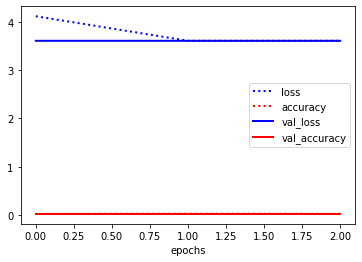

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Toy usage example
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((49152,), input_shape=(128,128,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(37, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Max val score: 2.72%


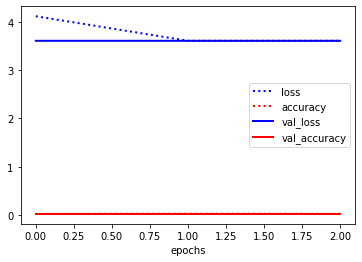

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Toy usage example
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Convolutional neural networks (15 points)
### Question 1.1: Design a ConvNet (12 points)
- Build a sequential convolutional neural network to distinguish cats from dogs. You can use the relabeling to a binary problem below.
- Try to achieve the best validation accuracy you can. You should be able to get at least 75% accuracy. 85% or more is also possible. You can use any depth, any combination of layers, and any kind of regularization and tuning. You can use different batch sizes and number of epochs as in question 1.
- Add a description of your design choices in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- Explictly explore different filter sizes and padding techniques. Explain what the effect is, also in relationship with the layer input sizes.
- You are allowed **1000** characters for this answer (but don’t ramble).
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data as shown below.

In [ ]:
# Makes the problem binary. Don't change or overwrite these variables.
pets_classes = {0: "cat", 1: "dog"}
train_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_train])
val_classes  = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_val])
y_train_binary = np.array([0 if class_names[train_classes[i]] in cat_breeds else 1 for i in range(len(y_train))])
y_val_binary = np.array([0 if class_names[val_classes[i]] in cat_breeds else 1 for i in range(len(y_val))])
evaluation_split_binary = X_train, X_val, y_train_binary, y_val_binary

In [ ]:
from keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_1():
    pass

run_evaluation("model_1_1", build_model_1_1, evaluation_split_binary, base_dir, 
               train=True, epochs=3, batch_size=32)

answer_q_1_1 = """
             Your answer 
             """
print("Answer is {} characters long".format(len(answer_q_1_1)))

No model is returned by the model_builder
Answer is 40 characters long


Training the model
Epoch 1/60
74/74 [==============================] - 68s 94ms/step - loss: 1.0748 - accuracy: 0.5826 - val_loss: 1.5651 - val_accuracy: 0.3240
Epoch 2/60
74/74 [==============================] - 6s 74ms/step - loss: 0.9407 - accuracy: 0.6441 - val_loss: 1.7844 - val_accuracy: 0.3223
Epoch 3/60
74/74 [==============================] - 5s 73ms/step - loss: 0.8534 - accuracy: 0.6853 - val_loss: 1.1724 - val_accuracy: 0.3759
Epoch 4/60
74/74 [==============================] - 5s 73ms/step - loss: 0.8096 - accuracy: 0.6929 - val_loss: 0.8136 - val_accuracy: 0.6820
Epoch 5/60
74/74 [==============================] - 5s 72ms/step - loss: 0.7400 - accuracy: 0.7291 - val_loss: 0.8188 - val_accuracy: 0.6811
Epoch 6/60
74/74 [==============================] - 5s 73ms/step - loss: 0.6877 - accuracy: 0.7569 - val_loss: 0.7021 - val_accuracy: 0.7024
Epoch 7/60
74/74 [==============================] - 5s 73ms/step - loss: 0.6439 - accuracy: 0.7679 - val_loss: 0.8381 - val_accuracy: 

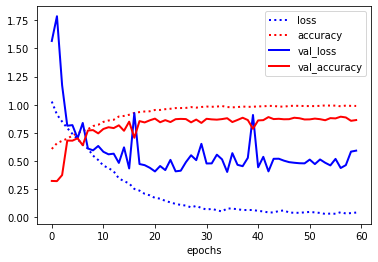

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
## MODEL SOLUTION
from keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_1():
    
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same", input_shape=(128,128,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(256, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(256, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(
        learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split_binary, base_dir, 
               train=True, epochs=60, batch_size=64)

answer_q_1_1 = """
A VGG-like network is designed and trained. The model has six 'blocks' of convolutional layers with maxpooling, batch normalization and dropout in between. 
Batch nomalization layers help the network converge faster and dropout is used for regularization. The number of filters in each block are same and double every two blocks
to compensate for the loss of resolution when maxpooling. Zero-padding is applied to avoid shrinking the tensors too fast. The last layer in the model is a fully connected layer. This a binary classification 
task so the sigmoid activation function is utilized in the output layer since this is a binary problem. We use a global average pooling layer rather than simply flattening the output. This reduces the size 
of the output to 256 which makes it easier to train the dense layer, and this seems to work better. Batch size is set to be 64 to speed up training but not incure a generalization gap.
Learning rate is 0.001, adapted using the Adam optimizer, which gave slightly better results. The network has been trained for 60 epochs, as more epochs did not improve performance. 
The accuracies on the validation set are higher than 85%, and closer to 89%. There is still a gap between the training and validation loss, which is probably better addressed using data augmentation
rather than further engineering.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not? Reason
about what might work or not on these images.
- Implement the generator in a function `augment_data` that returns a generator and the validation set
- Evaluate the model from question 1.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_1_2'.
- Add a description of your design choices in 'answer_q_1_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
Epoch 1/3
60/60 [==============================] - 5s 48ms/step - loss: 1.2614 - accuracy: 0.5648 - val_loss: 1.3440 - val_accuracy: 0.3214
Epoch 2/3
60/60 [==============================] - 3s 44ms/step - loss: 1.0087 - accuracy: 0.6320 - val_loss: 1.0310 - val_accuracy: 0.6403
Epoch 3/3
60/60 [==============================] - 3s 44ms/step - loss: 0.9654 - accuracy: 0.6265 - val_loss: 1.1033 - val_accuracy: 0.3980
Saving to file
Model stored in /content/drive/My Drive/assignment-3-test
Max val score: 64.03%


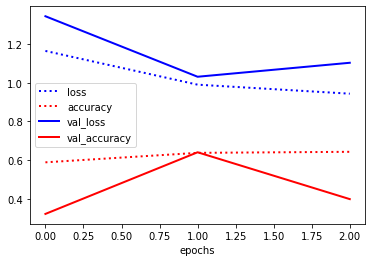

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
# Note that we build the same untrained model as in question 1.1 but store the 
# trained version as model_1_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data():
  """ Augments the data and returns a generator and the validation data and labels
  """
  # Boilerplate code. You can change this however you like.
  generator = ImageDataGenerator().flow(X_train, y_train_binary)
  return generator, X_val, y_val_binary

# Batch size should be None since we are using a generator.
# You can add a steps_per_epoch parameter if you like
run_evaluation("model_1_2", build_model_1_1, augment_data(), base_dir, 
               train=True, generator=True, epochs=3, batch_size=None)

answer_q_1_2 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_1_2)))

Training the model
Epoch 1/80
73/73 [==============================] - 19s 248ms/step - loss: 1.1811 - accuracy: 0.5596 - val_loss: 1.6671 - val_accuracy: 0.3231
Epoch 2/80
73/73 [==============================] - 18s 243ms/step - loss: 0.9583 - accuracy: 0.6509 - val_loss: 0.9599 - val_accuracy: 0.5757
Epoch 3/80
73/73 [==============================] - 18s 240ms/step - loss: 0.8894 - accuracy: 0.6705 - val_loss: 0.8490 - val_accuracy: 0.6947
Epoch 4/80
73/73 [==============================] - 18s 240ms/step - loss: 0.8252 - accuracy: 0.6955 - val_loss: 0.7529 - val_accuracy: 0.7279
Epoch 5/80
73/73 [==============================] - 17s 237ms/step - loss: 0.8029 - accuracy: 0.6986 - val_loss: 0.7411 - val_accuracy: 0.7109
Epoch 6/80
73/73 [==============================] - 18s 240ms/step - loss: 0.7441 - accuracy: 0.7235 - val_loss: 0.7584 - val_accuracy: 0.6947
Epoch 7/80
73/73 [==============================] - 18s 240ms/step - loss: 0.7220 - accuracy: 0.7174 - val_loss: 0.8000 - v

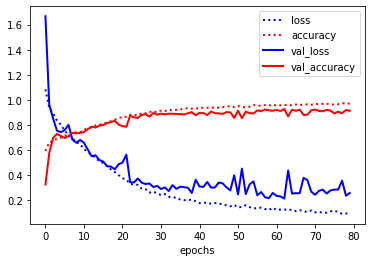

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)       

In [ ]:
# MODEL SOLUTION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data():
    # Get original split
    X_train_pre, X_val_pre, y_train_pre, y_val_pre = evaluation_split
    # Binarize labels
    y_train_pre = y_train_binary
    y_val_pre = y_val_binary

    train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
    it_train = train_datagen.flow(X_train_pre, y_train_pre, batch_size=64)

    return it_train, X_val_pre, y_val_pre
    

run_evaluation("model_1_2", build_model_1_1, augment_data(), base_dir, train=True, generator=True, epochs=80, batch_size=None, steps_per_epoch=X_train.shape[0]//64)


answer_q_1_2 = """
We use width and height shift, horizontal flip, and zoom for data augmentation. 
These type of variance already occur naturally in the dataset, which make them good candidates for improving generalization error.
We use both horizontal and vertical shift since the network should be invariant to small translations. 
Horizontal flips and small amounts of zoom should be helpful because they don't distort the image but do provide an additional perspective. 
Random rotation did not lead to an improvement in performance, likely because the images are up-right. 
It is illustrated that the methods of data augmentation has helped the model to achieve accuracy above 90% on 
on validation set, which is 3% to 5% higher than the results obtained on original dataset. Also the gap between the train and validation loss has decreased.
"""

print("Answer is {} characters long".format(len(answer_q_1_2)))

## Part 2. Model interpretation (15 points)
### Question 2.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_1_2) by evaluating it on the test data. You do not need to retrain the model, you can just reload it.
* What is the accuracy of model_1_2 on the test data? Store this in 'test_accuracy_2_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Analyze the misclassifications in more depth by visualizing which kinds of mistakes are made for each class (cat or dog). For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'. This is more of an open question. Some examples are sufficient, you don't need to plot all misclassifications.
* Summarize your findings in 'answer_q_2_1'. Is your model performing well, or
is it misguided in some way?

In [ ]:
def evaluate_model():
    pass
test_accuracy_2_1 = evaluate_model()

def plot_confusion_matrix():
    pass
def plot_misclassifications():
    pass

plot_confusion_matrix()
plot_misclassifications()

answer_q_2_1 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 44 characters long


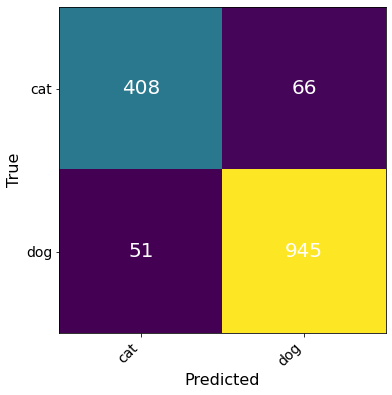

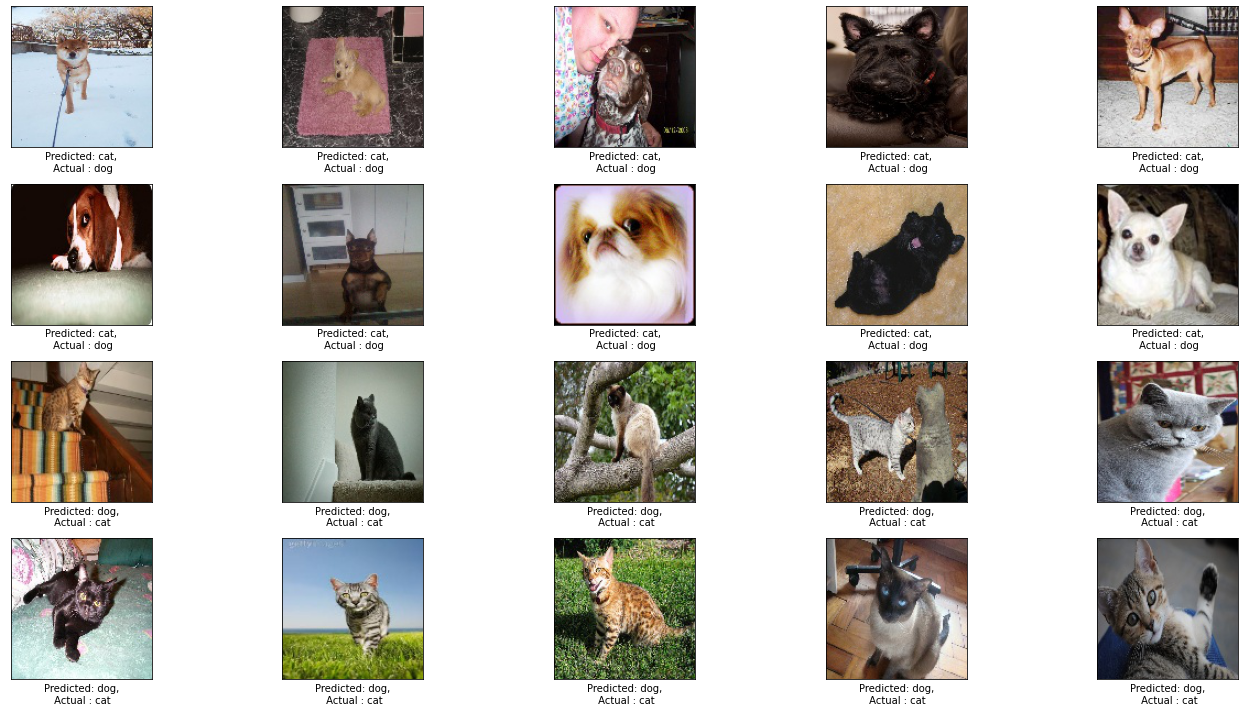

In [ ]:
# MODEL SOLUTION
from sklearn.metrics import confusion_matrix

# Helper function
def get_binary_predictions(model_name):
    model_1_2 = load_model_from_file(base_dir, model_name)
    y_pred = model_1_2.predict(X_test)
    y_pred = (y_pred > 0.5).flatten()

    test_classes  = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_test])
    y_test_binary = np.array([0 if class_names[test_classes[i]] in cat_breeds else 1 for i in range(len(y_test))])
    return y_pred, y_test_binary

def evaluate_model(model_name):
    y_pred, y_test_binary = get_binary_predictions("model_1_2")
    test_accuracy = "{:.3f}".format(sum(y_pred == y_test_binary)/ y_test.shape[0])
    return test_accuracy

test_accuracy_2_1 = evaluate_model("model_1_2")

def plot_confusion_matrix():
    y_pred, y_test_binary = get_binary_predictions("model_1_2")
    cm = confusion_matrix(y_test_binary, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(2)), ax.set_yticks(np.arange(2))
    ax.set_xticklabels(list(pets_classes.values()), rotation=45, ha="right", size = 14)
    ax.set_yticklabels(list(pets_classes.values()), size = 14)
    ax.set_ylabel('True', size = 16)
    ax.set_xlabel('Predicted', size = 16)
    for i in range(4):
        ax.text(int(i/2),i%2,cm[i%2,int(i/2)], ha="center", va="center", color="w", size = 20)

def plot_misclassifications():
    y_pred, y_test_binary = get_binary_predictions("model_1_2")
    misclassified_samples = np.where(y_test_binary != y_pred)[0]
    wrong_cats = [X_test[i] for i in misclassified_samples if y_test_binary[i] == 1]
    wrong_dogs = [X_test[i] for i in misclassified_samples if y_test_binary[i] == 0]
    wrong_pets = wrong_cats[:10] + wrong_dogs[:10]
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
    for nr, wrong_pet in enumerate(wrong_pets):
        row = nr//5
        col = nr%5
        axes[row][col].imshow(wrong_pets[nr])
        axes[row][col].set_xlabel("Predicted: %s,\n Actual : %s" % (pets_classes[int(nr > 9)], "cat" if nr > 9 else "dog"))
        axes[row][col].set_xticks(()), axes[row][col].set_yticks(())
    plt.tight_layout()

plot_confusion_matrix()
plot_misclassifications()

answer_q_2_1 = """
               Looking at the confusion matrix, our model seems quite balanced. It is not making significantly more FP than FN. Looking at the misclassifications,
               they also don't seem very worrysome. In some cases, dogs are misclassified as cats because they have cat-like ears. Maybe the model is still too focussed on 
               that pattern. Also, most misclassified dogs are small, almost cat-sized. In other cases, cats are misclassified as dogs because they are pictured in a way 
               that they look larger, e.g. against a background which is either very even of has a lot of other small objects (leafs, grass, tiles). In case cases, however,
               I can't see a very convincing explanation other than that more data is needed to better train the model.
               """

In [ ]:
test_accuracy_2_1

'0.920'

### Question 2.2: Visualizing activations (8 points)

* Select the **14th** example from the test set (index 13, it should be a small dog). Retrieve and visualize the activations (feature maps) of model 1_2 for that example, for every filter for different convolutional layers (at different depths in the network). Implement a function `plot_activations()` that returns these activations. Check the code in the notebook of the CNN lecture to see how this is usually done.
* Give an explanation (as detailed as you can) about your observations in 'answer_q_2_2'. Is your model indeed learning something useful?

In [ ]:
def plot_activations():
    pass
answer_q_2_2 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 44 characters long


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


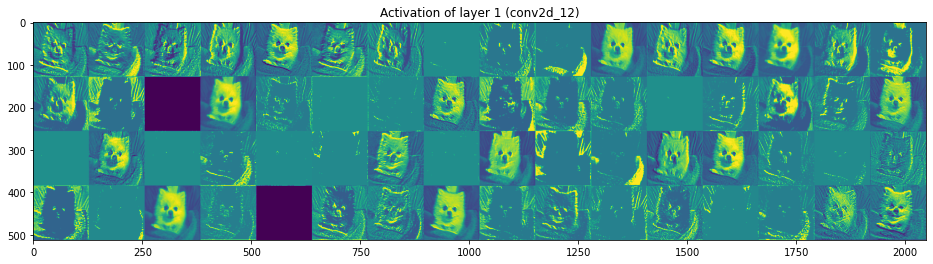

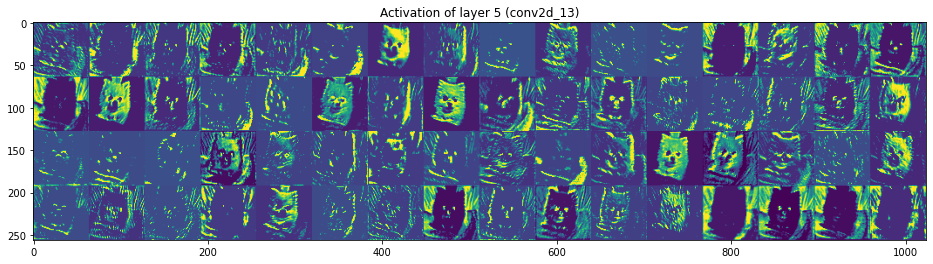

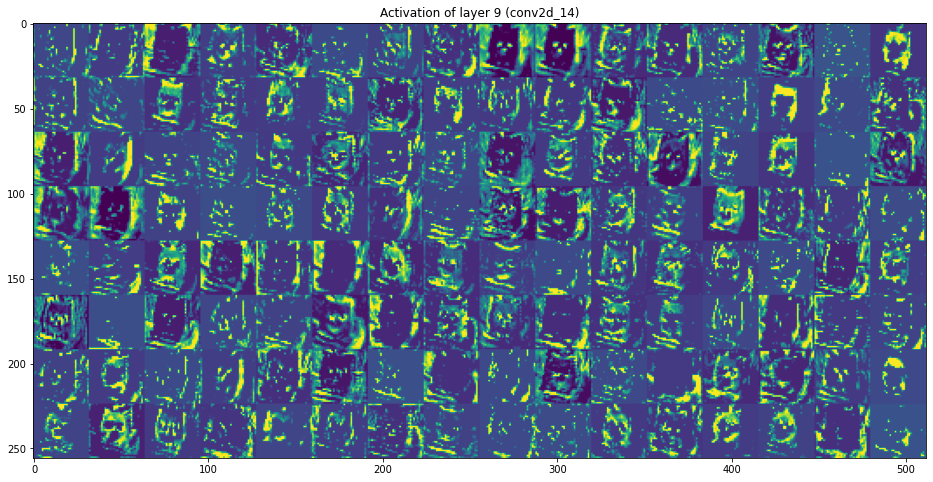

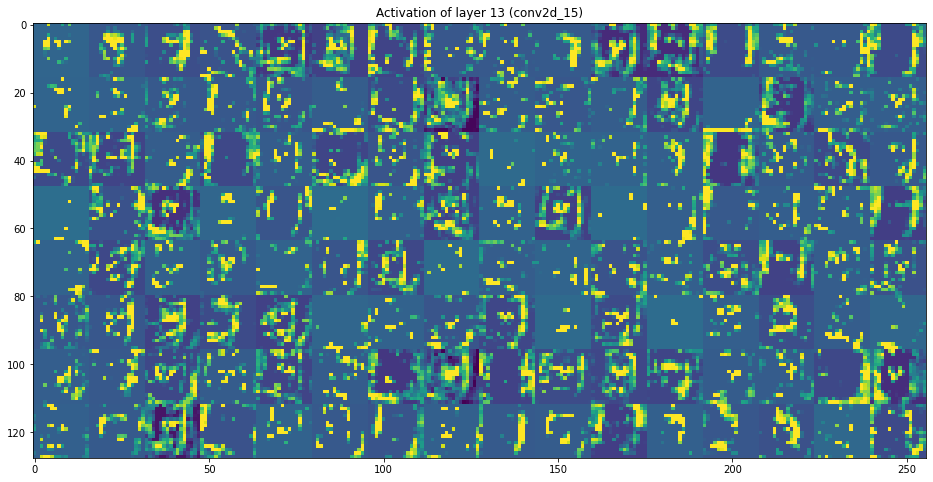

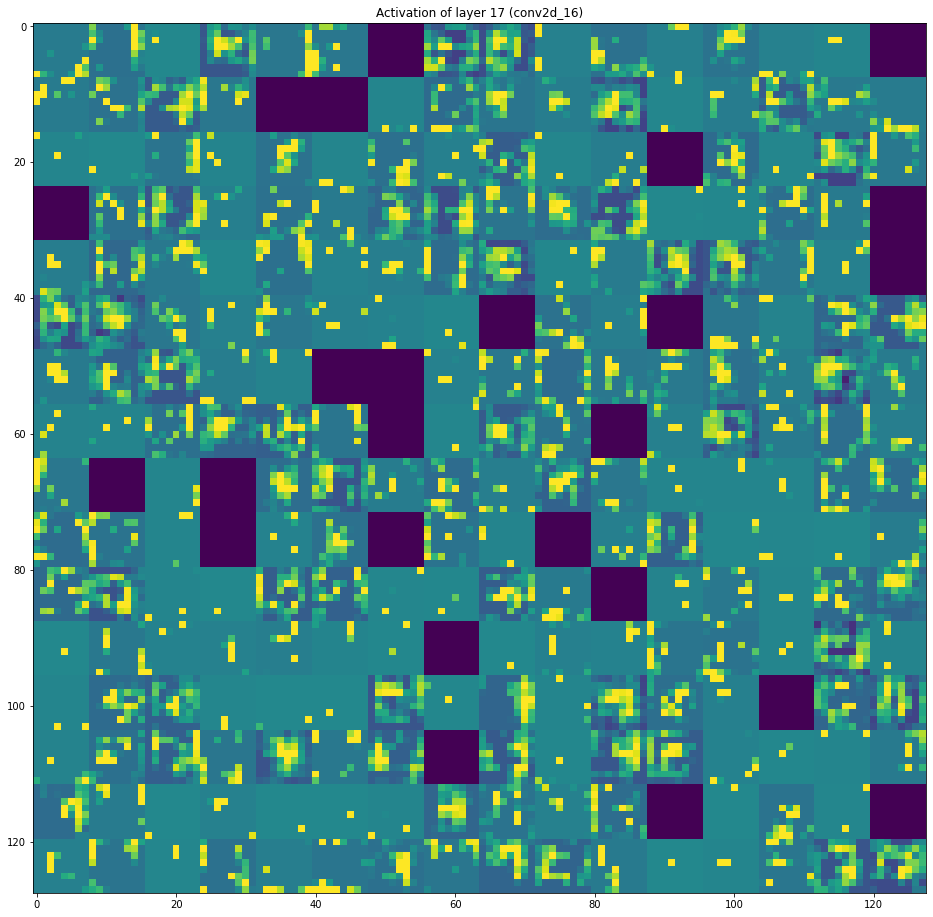

In [ ]:
# MODEL SOLUTION
images_per_row = 16

def plot_activations():
    model_1_2 = load_model_from_file(base_dir, "model_1_2")
    layer_names = []
    for layer in model_1_2.layers[:17]:
        layer_names.append(layer.name)
    img_tensor = X_test[13]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    layer_outputs = [layer.output for layer in model_1_2.layers[:17]]
    activation_model = models.Model(inputs=model_1_2.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    layer_indexes = [0, 4, 8, 12, 16]
    for layer_index in layer_indexes:
        start = layer_index
        end = layer_index+1

        # Now let's display our feature maps
        for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
            # This is the number of features in the feature map
            n_features = layer_activation.shape[-1]

            # The feature map has shape (1, size, size, n_features)
            size = layer_activation.shape[1]

            # We will tile the activation channels in this matrix
            n_cols = n_features // images_per_row
            display_grid = np.zeros((size * n_cols, images_per_row * size))

            # We'll tile each filter into this big horizontal grid
            for col in range(n_cols):
                for row in range(images_per_row):
                    channel_image = layer_activation[0, :, :, col * images_per_row + row]
                    # Post-process the feature to make it visually palatable
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

            # Display the grid
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
            plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

plot_activations()


answer_q_2_2 =  """
                There are eight convolutional layers in our model and we visualized all feature maps of them. Below are the 5 most interesting to discuss. It can be observed that 
                different feature maps in different layers are focusing on different regions of the image. Some feature maps capture edges while
                others extract some specific sections. The starting layers are able to keep the shape the of the dog in the foreground, which means that the main 
                information in the image is kept, while ignoring the less important background. When we go deeper, the patterns captured by convolution kernels become more and more 
                abstract and sparse. For example, filters begin to capture higher-level features such as edges, corners and angles. Even deeper, they respond to eyes and ears. 
                Even deepen layers show abstract combinations of these high-level features. We can see that here, there are more feature maps which are entirely black. 
                The reason is that these high-level patterns are not common and might not even exist in this image. It indicates that the network begins to focus on the class 
                he image (cat/dog) instead of low-level features.
                """

### Question 2.3: Visualizing the learned embeddings with tSNE (5 points)

Extract the learned embeddings of the images from X_train using your `model_1_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings based on the  Convolutional part of `model_1_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels
- Interpret the results from the map in `answer_q_2_3`

In [ ]:
from sklearn.manifold import TSNE

def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    return None

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    return None

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_1_2")
d2_embs = compute_tsne(dn_embs)

In [ ]:
import seaborn as sns

def plot_tsne(tsne_embeds, labels):
    pass

plot_tsne(d2_embs, y_train_binary)

answer_q_2_3 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_2_3)))

Answer is 44 characters long


In [ ]:
# MODEL SOLUTION
from sklearn.manifold import TSNE
from tensorflow.keras import Model

def create_embeddings(model_file):

    model = load_model_from_file(base_dir, model_file)
    emb_layer_index = -5
    feature_extraction_model = Model(model.inputs, model.layers[emb_layer_index].output)
    features_train = feature_extraction_model.predict(X_train)
    features_train = features_train.reshape(features_train.shape[0], -1)
   
    return features_train


def compute_tsne(original_array):
  
   print("Start TSNE for {} vectors of {}d ...".format(
        len(original_array), len(original_array[0])))
   tsne_model = TSNE(perplexity=200, n_components=2, init='pca', n_iter=2500, 
                     random_state=13, verbose = 2, n_jobs = -1)
   reduced_array = tsne_model.fit_transform(original_array)
   print("Finish TSNE")

   return reduced_array

dn_embs = create_embeddings("model_1_2")
d2_embs = compute_tsne(dn_embs)

Start TSNE for 4703 vectors of 256d ...
[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 4703 samples in 0.158s...
[t-SNE] Computed neighbors for 4703 samples in 8.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4703
[t-SNE] Computed conditional probabilities for sample 2000 / 4703
[t-SNE] Computed conditional probabilities for sample 3000 / 4703
[t-SNE] Computed conditional probabilities for sample 4000 / 4703
[t-SNE] Computed conditional probabilities for sample 4703 / 4703
[t-SNE] Mean sigma: 3.912143
[t-SNE] Computed conditional probabilities in 1.663s
[t-SNE] Iteration 50: error = 58.4879494, gradient norm = 0.0170585 (50 iterations in 4.175s)
[t-SNE] Iteration 100: error = 58.9471588, gradient norm = 0.0157838 (50 iterations in 4.305s)
[t-SNE] Iteration 150: error = 58.6267929, gradient norm = 0.0155477 (50 iterations in 4.455s)
[t-SNE] Iteration 200: error = 58.0989227, gradient norm = 0.0358435 (50 iterations in 4.172s)
[t-SNE] Iteration 250: erro

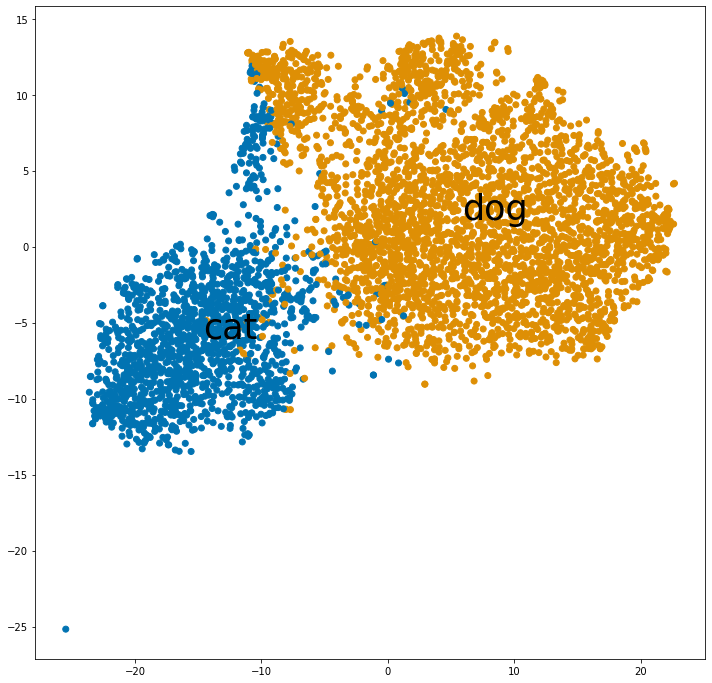

In [ ]:
# MODEL SOLUTION
import seaborn as sns

def plot_tsne(tsne_embeds, labels):

  x = [elem[0] for elem in tsne_embeds]
  y = [elem[1] for elem in tsne_embeds]

  fig = plt.figure(figsize = (12, 12))

  num_classes = len(np.unique(labels))
  palette = np.array(sns.color_palette("colorblind", num_classes))

  plt.scatter(x, y, c = palette[labels.astype(np.int)])
  
  if num_classes == 2:
    cluster_names = pets_classes
    size = 35
  else:
    cluster_names = class_names
    size = 15

  for i in range(num_classes):
    x_text, y_text = np.median(tsne_embeds[labels == i, :], axis = 0)
    txt = plt.text(x_text, y_text, cluster_names[i], fontsize = size)
  plt.show()


plot_tsne(d2_embs, y_train_binary)

In [ ]:
answer_q_2_3 = """
               The embedding learned by the convolutional part of our network has a dimensionality of 256, and tSNE reduced that to 2D.
               When plotting the 2D embedding and color-code the points by their class label, we can see that it clearly separated the
               cats from the dogs, although some images of cats fall inside the 'dog' cluater and vice versa. I varied the perplexity
               hyperparameter a bit, but overall the results are quite consistent.
               """

## Part 3. Transfer learning (20 points)
### Question 3.1 Transfer learning from VGG16 (8 points)

- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_3_1` that adds at least one dense hidden layer and output layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers, in a systematic way, and evaluate whether that works better. You can also consider adding multiple dense hidden layers and regularization layers.
- Train the resulting model on the augmented training data for the 37-class problem (**not binary classification**).
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_1'.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

# Load ImageNet pre-trained VGG16
conv_base = None

def augment_data_multi_class():
  """ Augments the data and returns a generator and the validation data and labels
  """
  # Boilerplate code. You can change this however you like.
  generator = ImageDataGenerator().flow(X_train, y_train)
  return generator, X_val, y_val

def build_model_3_1():
    pass

run_evaluation("model_3_1", build_model_3_1, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=3, batch_size=None)

answer_q_3_1 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_3_1)))

No model is returned by the model_builder
Answer is 44 characters long


Training the model
Epoch 1/60
73/73 [==============================] - 30s 340ms/step - loss: 4.9300 - accuracy: 0.0530 - val_loss: 3.6452 - val_accuracy: 0.1437
Epoch 2/60
73/73 [==============================] - 19s 256ms/step - loss: 3.5434 - accuracy: 0.1844 - val_loss: 2.9729 - val_accuracy: 0.3019
Epoch 3/60
73/73 [==============================] - 19s 256ms/step - loss: 2.8882 - accuracy: 0.3050 - val_loss: 2.5291 - val_accuracy: 0.3810
Epoch 4/60
73/73 [==============================] - 19s 254ms/step - loss: 2.4657 - accuracy: 0.3978 - val_loss: 2.2054 - val_accuracy: 0.4677
Epoch 5/60
73/73 [==============================] - 19s 255ms/step - loss: 2.1447 - accuracy: 0.4845 - val_loss: 2.0115 - val_accuracy: 0.5085
Epoch 6/60
73/73 [==============================] - 19s 257ms/step - loss: 1.8779 - accuracy: 0.5394 - val_loss: 1.9019 - val_accuracy: 0.5374
Epoch 7/60
73/73 [==============================] - 19s 257ms/step - loss: 1.7022 - accuracy: 0.5890 - val_loss: 2.1212 - v

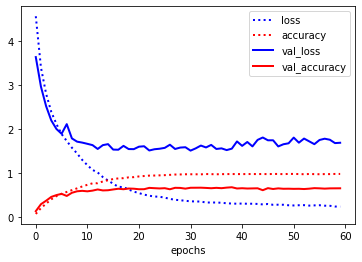

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
batch_normalization_21 (Batc (None, 4, 4, 512)         2048      
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 37)               

In [ ]:
# MODEL SOLUTION

from tensorflow.keras.applications.vgg16 import VGG16
from keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

def augment_data_multi_class():
    # Get original split
    X_train_pre, X_val_pre, y_train_pre, y_val_pre = evaluation_split

    train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
    it_train = train_datagen.flow(X_train_pre, y_train_pre, batch_size=64)
    return it_train, X_val_pre, y_val_pre

def build_model_3_1():
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.BatchNormalization())
    #model.add(layers.Flatten())
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(37, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

run_evaluation("model_3_1", build_model_3_1, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=60, batch_size=None, steps_per_epoch=X_train.shape[0]//64)

In [ ]:
answer_q_3_1 = """
               The pre-trained VGG didn't work very well out of the box. I tried unfreezing and finetuning some of the layers, and got the best results by only finetuning
               the last block. Since the model seems to be overfitted, I added batch normalization and dropout, and global average pooling so that there are fewer weights 
               to learn in the dense layer. Data augmentation was done as before. The accuracy is now around 68% (for the 37-class problem), so there seems to be room for 
               improvement.
               """

### Question 3.2 Choosing models to transfer (7 points)

Perform the same transfer learning as in `Question 3.1`, but choose a different pre-trained architecture. 

- Try to beat the performance of VGG16. 
- For a comparision between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d). 
- We recommend to choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). Keep in mind that bigger models don't always perform better, and make sure that the trained weights do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_2'.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *

# Load ImageNet pre-trained model, other than VGG16 or VGG19
conv_base = None

def build_model_3_2():
    pass

run_evaluation("model_3_2", build_model_3_2, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=3, batch_size=None)

answer_q_3_2 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_3_2)))

No model is returned by the model_builder
Answer is 44 characters long


Training the model
Epoch 1/40
73/73 [==============================] - 28s 309ms/step - loss: 3.2388 - accuracy: 0.2349 - val_loss: 1.7825 - val_accuracy: 0.6556
Epoch 2/40
73/73 [==============================] - 20s 268ms/step - loss: 1.7824 - accuracy: 0.5627 - val_loss: 1.4699 - val_accuracy: 0.7202
Epoch 3/40
73/73 [==============================] - 19s 263ms/step - loss: 1.5184 - accuracy: 0.6454 - val_loss: 1.2181 - val_accuracy: 0.7560
Epoch 4/40
73/73 [==============================] - 19s 264ms/step - loss: 1.3693 - accuracy: 0.6698 - val_loss: 1.0721 - val_accuracy: 0.7704
Epoch 5/40
73/73 [==============================] - 19s 266ms/step - loss: 1.2311 - accuracy: 0.7262 - val_loss: 0.9602 - val_accuracy: 0.7857
Epoch 6/40
73/73 [==============================] - 19s 263ms/step - loss: 1.1532 - accuracy: 0.7291 - val_loss: 0.9327 - val_accuracy: 0.7832
Epoch 7/40
73/73 [==============================] - 19s 264ms/step - loss: 1.0848 - accuracy: 0.7470 - val_loss: 0.9160 - v

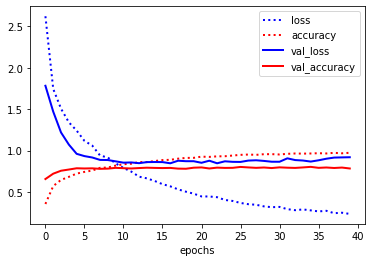

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 4, 4, 2048)        20861480  
_________________________________________________________________
batch_normalization_27 (Batc (None, 4, 4, 2048)        8192      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 256)         4718848   
_________________________________________________________________
batch_normalization_28 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 2, 2, 256)         0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 256)              

In [ ]:
# MODEL SOLUTION

from tensorflow.keras.applications.xception import Xception
conv_base = Xception(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block14_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

def build_model_3_2():
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), kernel_initializer= "he_normal", activation='relu', padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(37, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

run_evaluation("model_3_2", build_model_3_2, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=40, batch_size=None, steps_per_epoch=X_train.shape[0]//64)

In [ ]:
answer_q_3_2 = """
               Since the dataset is quite small it does not make sense to use very deep networks, since there isn;t enough data to finetume them. Also, the model
               should remain under 100MB in size. The Xception networks seems like a good candidate, but it was overfitting a lot initially and the output tensors 
               are quite large. I finetuned (unfroze) only the last layers, from block 14 on. I added one more convolution and maxpooling layer to reduce the size, 
               and several batch normalization layers because this is a deeper network which may suffer from vanishing gradients. I also added dropout to add further 
               regularization, and again a global average pooling layer to reduce the size of the flattened output. Finally, one dense layer is added with L2 
               regularization and additional batch normalization and dropout. The accuracy increased to 80%.
               """

### Question 3.3 Visualizing embeddings with tSNE (5 points)

Plot the same embeddings 2D map as in `Question 2.3`, but using `model_3_2` as the feature extractor. 

- Plot the 2D vector on a map highlighting the formed 37 clusters
- Interpret the results from the map in answer_q_3_3

Start TSNE for 4703 vectors of 256d ...
[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 4703 samples in 0.156s...
[t-SNE] Computed neighbors for 4703 samples in 8.354s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4703
[t-SNE] Computed conditional probabilities for sample 2000 / 4703
[t-SNE] Computed conditional probabilities for sample 3000 / 4703
[t-SNE] Computed conditional probabilities for sample 4000 / 4703
[t-SNE] Computed conditional probabilities for sample 4703 / 4703
[t-SNE] Mean sigma: 7.054379
[t-SNE] Computed conditional probabilities in 1.893s
[t-SNE] Iteration 50: error = 50.7592506, gradient norm = 0.0299195 (50 iterations in 3.872s)
[t-SNE] Iteration 100: error = 64.0527420, gradient norm = 0.0205452 (50 iterations in 3.920s)
[t-SNE] Iteration 150: error = 65.5326157, gradient norm = 0.0002478 (50 iterations in 3.868s)
[t-SNE] Iteration 200: error = 65.5511322, gradient norm = 0.0000609 (50 iterations in 3.872s)
[t-SNE] Iteration 250: erro

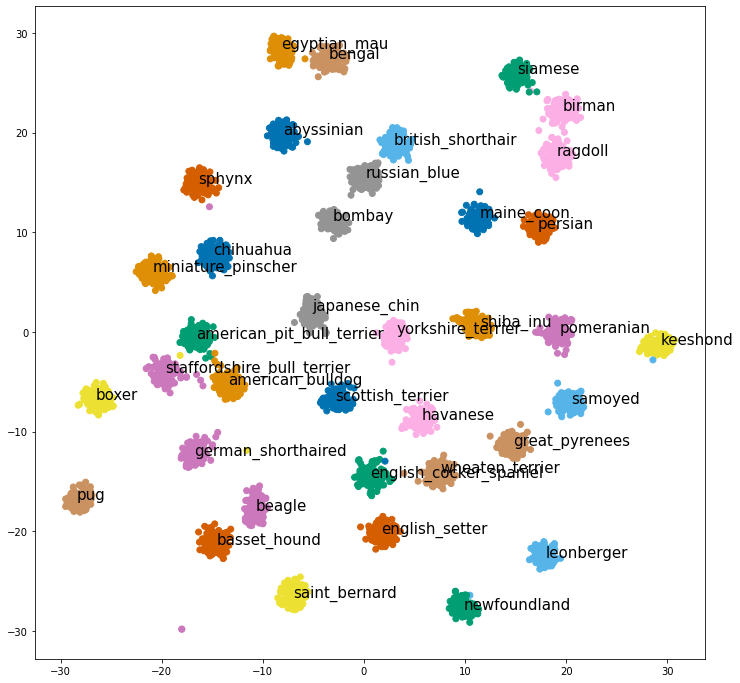

Answer is 44 characters long


In [ ]:
dn_embs_37 = create_embeddings("model_3_2")
d2_embs_37 = compute_tsne(dn_embs_37)

plot_tsne(d2_embs_37, train_classes)

answer_q_3_3 = """
               Your answer 
               """

print("Answer is {} characters long".format(len(answer_q_3_3)))

In [ ]:

answer_q_3_3 = """
               I applied tSNE the same way as before. We now get very clean clusters for each of the 37 classes, with only a few outliers.
               Hence, the model is clearly learning a good representation for this problem.
               """